<a href="https://colab.research.google.com/github/Ganeshwalimbe/Mobile-price-prediction-/blob/main/Ganesh_Walimbe_Mobile_price_prediction_capstone_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

# **In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**
**Data Description -**

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are talking on phone

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [131]:
#importing packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [168]:
#importing dataset
data=pd.read_csv("/content/drive/MyDrive/AlmaBetter /Capstone projects /Ganesh Walimbe -capstone project 3-Mobile price prediction/data_mobile_price_range.csv")

In [133]:
#print first 5 rows 
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [134]:
#printing last 5 rows
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [135]:
data.shape

(2000, 21)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [137]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [138]:
#cheking if missing values present in data 
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [139]:
#cheking if duplicate values present in data 
data.duplicated().sum()

0

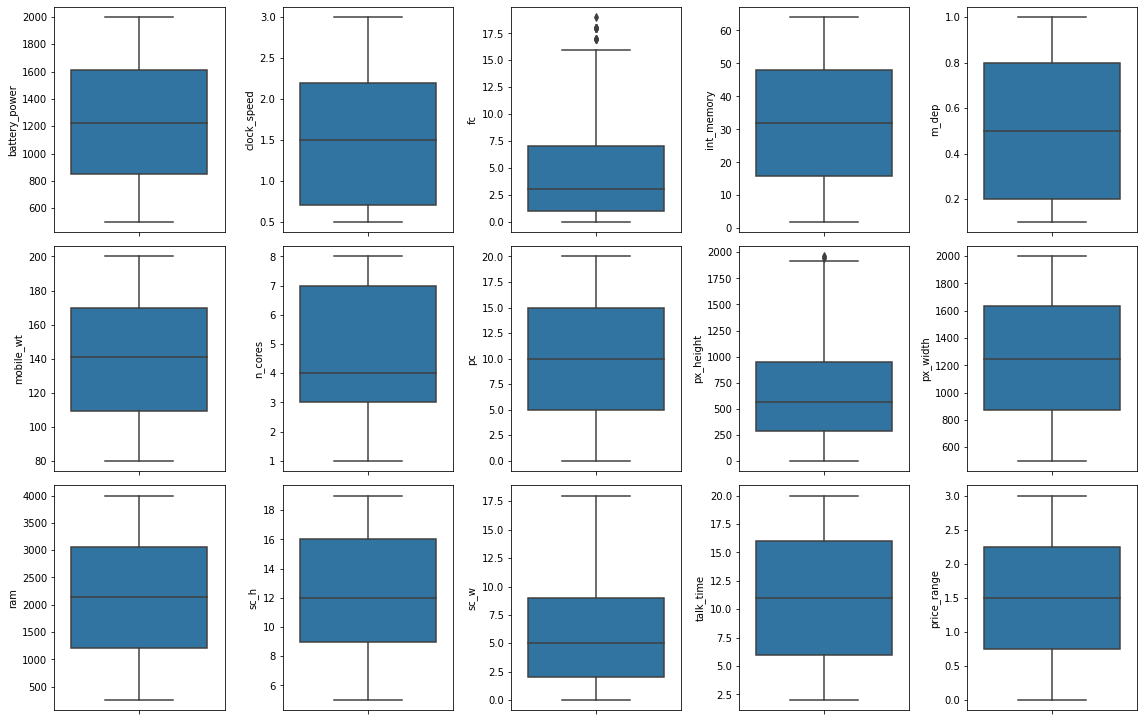

In [140]:
#plotting boxplots  of numerical variables 
fig = plt.figure(figsize=(16,30))
features=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','price_range']

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=data[features[i]])
plt.tight_layout()
plt.show()

**Outliers detection:**

 From these boxplots we can see that,

Almost  All the numerical variables does not contains any outliers Only 

fc-front camera megapixel and px_height -pixel height resolution  variable have few outliers

In [141]:
#defining variables
variables=data.columns.values

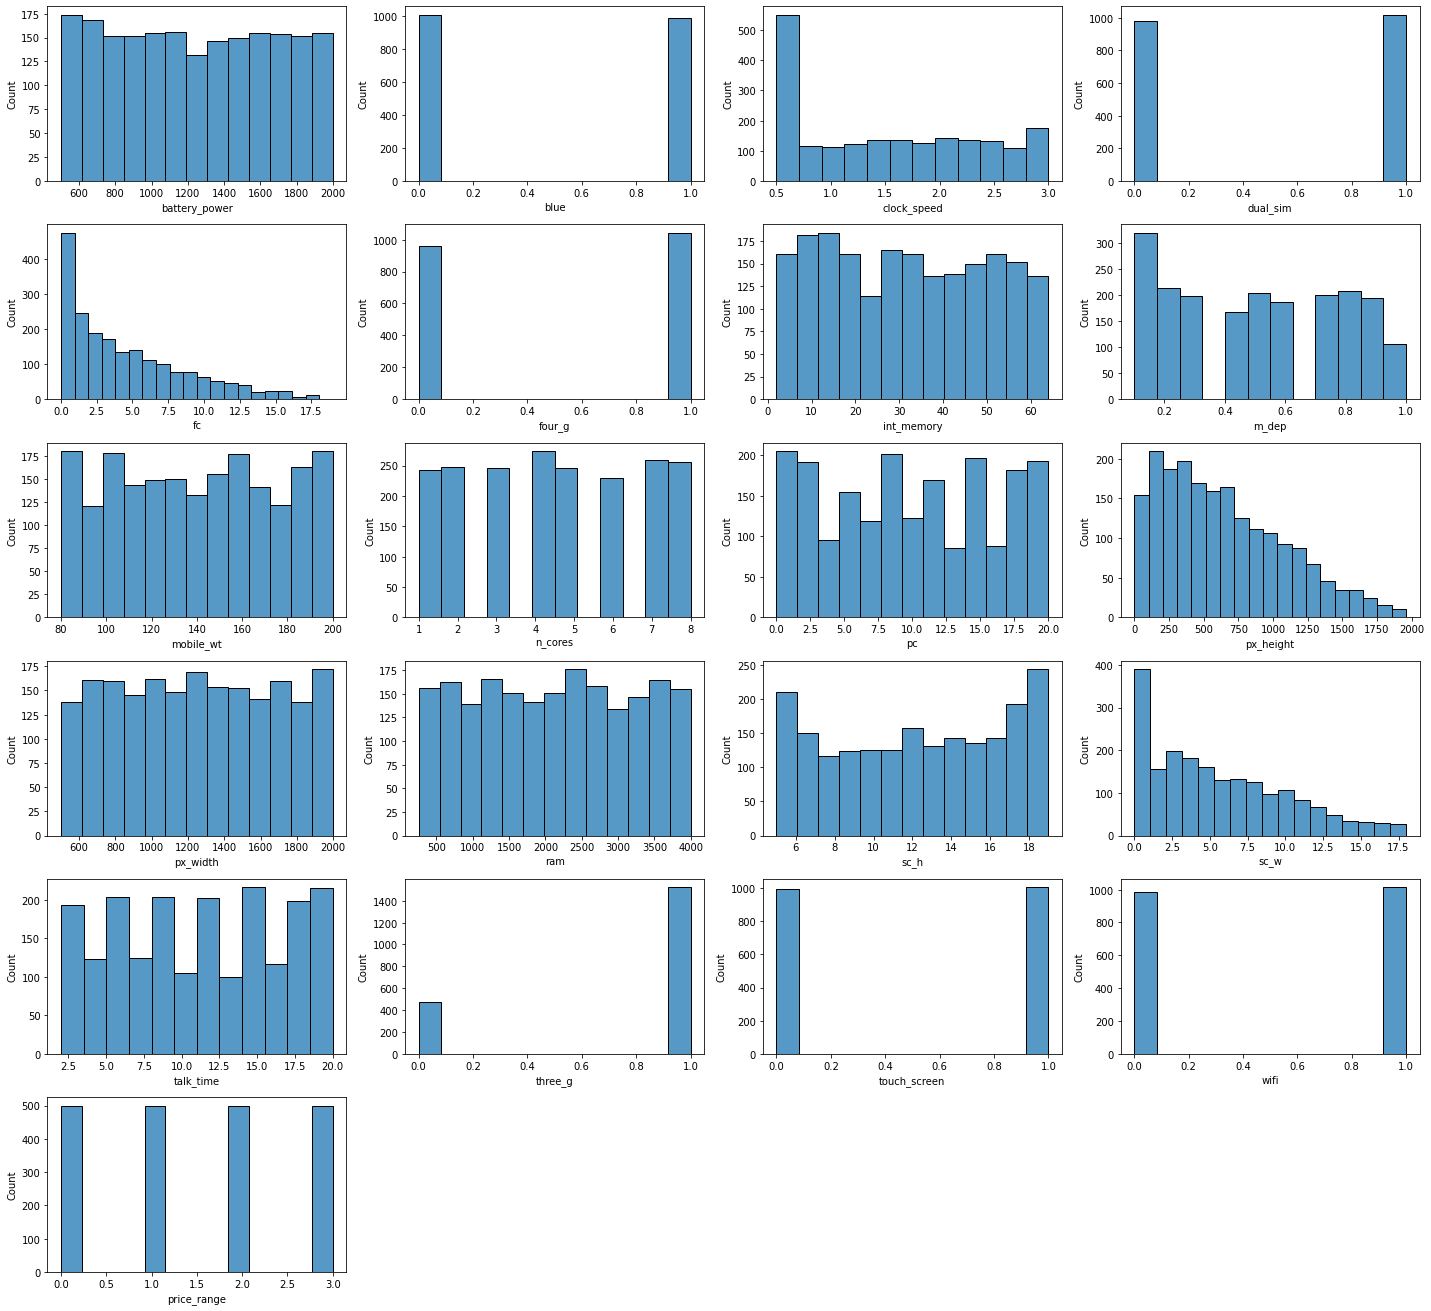

In [142]:
#plotting histogram of all the variables
fig=plt.figure(figsize=(20,30))

for i in range(len(variables)):
    fig.add_subplot(10, 4, i+1)
    
    sns.histplot(data[variables[i]])
plt.tight_layout()
plt.show()

**From  theses histogram we can see that**

1.Mobile phones company is providing  all kind kinds of battery power ranges from 600mAH to 2000mAH

2.Almost  50% of the phones has Bluetooth and four G network .

3.Mobile phone companies are providing  more 0 to 8 megapixel front cameras phones as compared to 8 to 17.5 megapixel front cameras.

4.Mobile weights of the phones is ranging from 80gm to 200 gm. 
    
5.Mobile companies are providing number of cores of processors from 1 to 8 processors in the phones

6.The speed at which microprocessor executes instructions for phones is ranges from 0.5 to 3.0 

7.Almost  50% of the phones has dual sim feature  Internal memory of the phones ranges from 0 to 60 Gigabytes.

8.Primary camera megapixel of the phones varies from 0 to 20 megapixels . Mobile Depth in cm is varies from 0.2 cm to 1cm.

9.Pixel resolution height  of the phones varies from o to 2000.

10.Pixel resolution  width of the mobile phones are varying from 600 to 2000 

11.Ram of the mobile phones is varying from 500mb to 4000mb  

12.Almost 70% mobiles have three G network  There are four price ranges available for phones.

13.Screen height of the phones ranges from 6cm to 18cm and Screen width ranges from 1cm to 17.5cm 

14.Almost 50% of the phones have touch screen Almost 50% of the phones have wifi feature .





[Text(0.5, 1.0, 'price v/s ram')]

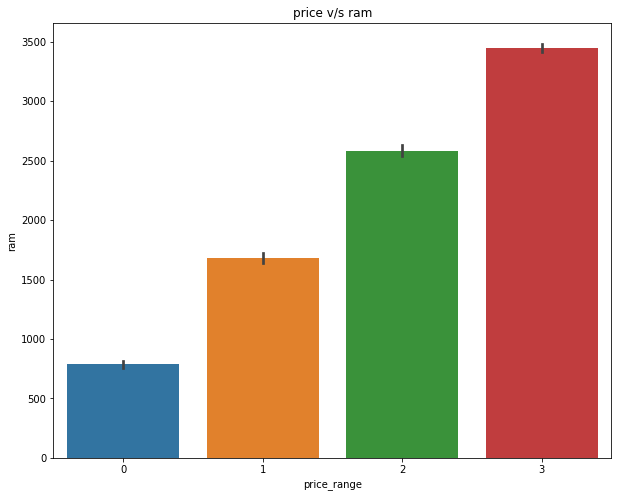

In [143]:
#plotting barplot of price range v/s ram plot
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,y='ram',x='price_range',ax=ax)
ax.set(title='price v/s ram')

From price v/s ram barplot we can see that price range is increasing as the ram of the mobile is increasing

[Text(0.5, 1.0, 'price v/s battery power')]

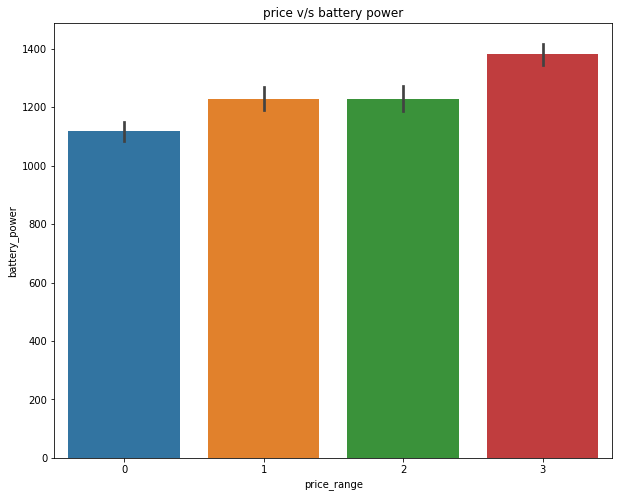

In [144]:
#plotting barplot of price range v/s battery plot
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,y='battery_power',x='price_range',ax=ax)
ax.set(title='price v/s battery power')

from price v/s battery power barplot we can see that the price range is almost same for all battery power variants.

[Text(0.5, 1.0, 'price v/s internal memory')]

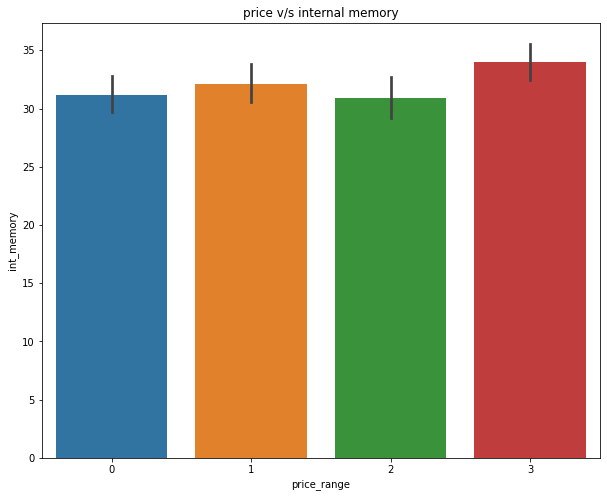

In [145]:
#plotting barplot of price range v/s internal memory
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,y='int_memory',x='price_range',ax=ax)
ax.set(title='price v/s internal memory')

from price v/s internal memory barplot we can see that the price range is almost same for all internal memory variants of the mobiles .

[Text(0.5, 1.0, 'price range  v/s primary camera megapixel ')]

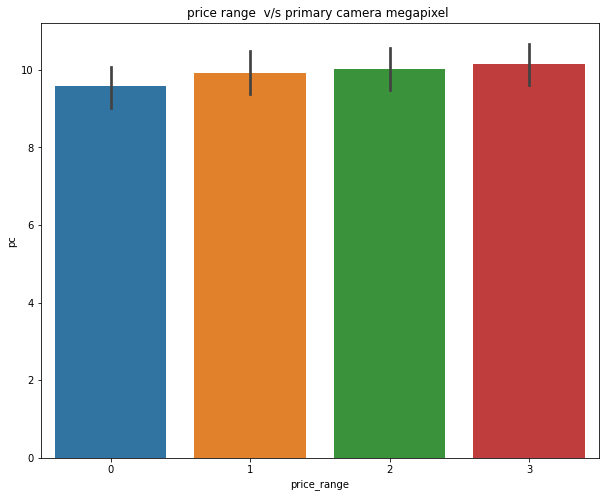

In [146]:
#plotting barplot of price range v/s primary camera megapixel
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,y='pc',x='price_range',ax=ax)
ax.set(title='price range  v/s primary camera megapixel ')

from price v/s primary camera megapixel barplot we can see that the price range is almost same for all primary camera megapixel variants of the mobile.

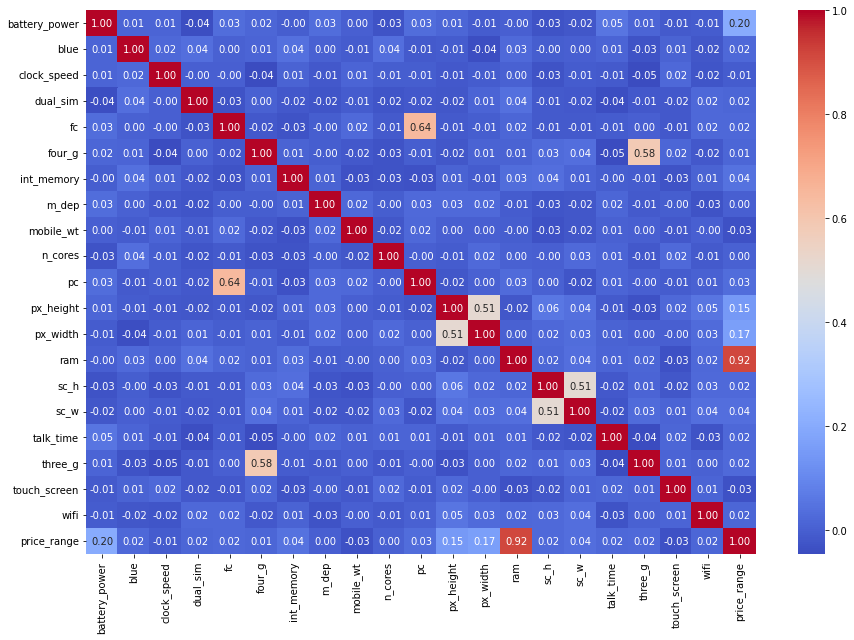

In [147]:
#plotting correlationplot all variables 
corr=data.corr()
fig=plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

**Obsevation from correlationplot:**
From correlationplot we can see that four_g variable is highly correlated with three_g 

Pc is highly correlated with fc variable. 

Sc_h-screen height is highly correlated with sc_w-screen width.

Px_height-pixel resolution height is also highly correlated with px_width-pixel resolution width.

Ram is highly correlated with our target variable price range  
   
And battery power is moderately correlated with our target variable price range. 

In [148]:
#dropping columns with high multicollinearity 
data=data.drop(['fc','three_g'],axis=1)

In [149]:
#crating new columns to reduce multicollinearity
data['px_area']=data['px_height']*data['px_width']
data['sc_area']=data['sc_h']*data['sc_w']

In [150]:
data=data.drop(['px_height','px_width','sc_h','sc_w'],axis=1)

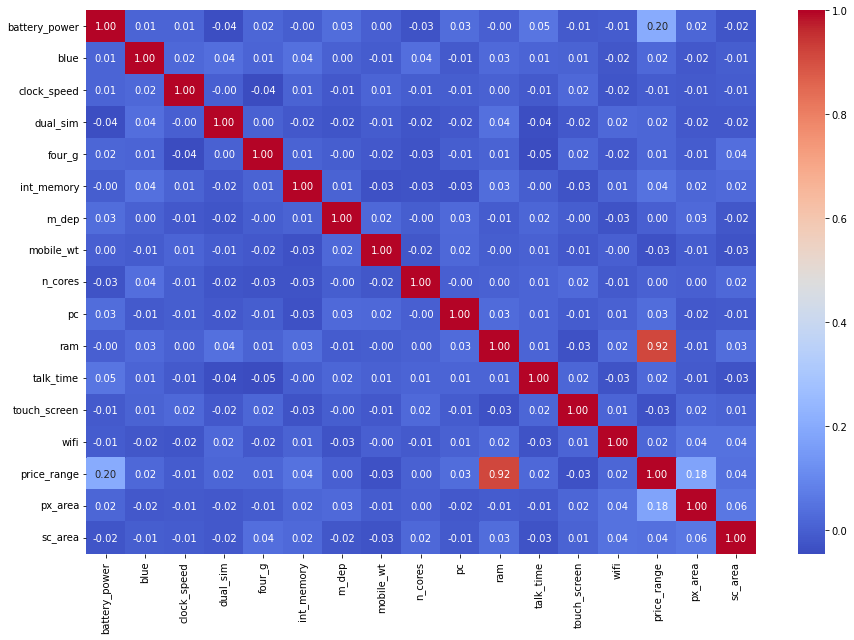

In [151]:
#cheking if multicolinrarity is reduced
corr=data.corr()
fig=plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [152]:
#defining independent and dependent variables 
X=data.drop('price_range',axis=1)
y=data['price_range']

In [153]:
#performing train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1600, 16)
(400, 16)


In [154]:
#cheking if target variable is balanced 
y_train.value_counts()

1    408
0    405
2    401
3    386
Name: price_range, dtype: int64

# **Logistic regression**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

In [155]:
#fitting logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [156]:
clf.coef_

array([[ 5.36298339e-04,  7.69169073e-05,  2.87414179e-04,
         8.65981971e-05,  8.83734581e-05,  5.03891033e-03,
         7.26489634e-05,  2.33378952e-02,  8.50029394e-04,
         1.54743899e-03, -3.13972629e-03,  1.67413318e-03,
         9.82739246e-05,  8.50513434e-05, -5.68211694e-07,
         1.50663221e-02],
       [ 4.06198231e-04,  2.29814641e-05,  7.01654940e-05,
         4.37353280e-05,  3.51617634e-05,  1.97491230e-03,
         3.68419792e-05,  7.16580062e-03, -3.38168216e-05,
         6.14706041e-04, -3.52800580e-04,  6.91357012e-04,
         3.65736985e-05,  3.06857141e-05,  2.32070248e-08,
         7.63744728e-04],
       [-3.96506689e-04, -2.60094892e-05, -6.79571083e-05,
        -3.01808633e-05, -4.28556514e-05, -1.86106118e-03,
        -1.67710240e-05, -1.53615635e-03, -1.13236378e-05,
        -2.96492654e-04,  9.96425135e-04, -4.40637300e-04,
        -3.98559093e-05, -1.38102601e-05,  7.62907473e-08,
        -4.53984511e-03],
       [-5.45989874e-04, -7.38888822e

In [157]:
clf.intercept_

array([ 1.73419056e-04,  5.10791377e-05, -3.35645427e-05, -1.90933651e-04])

In [158]:
# Getting the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [159]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [160]:
test_preds

array([0.00759608, 0.17741958, 0.35111751, 0.4358254 , 0.02702667,
       0.40369874, 0.43749767, 0.08014372, 0.10072083, 0.39068223,
       0.4628539 , 0.01073107, 0.5041643 , 0.55215684, 0.06697151,
       0.14795143, 0.00297462, 0.35739913, 0.29250502, 0.50315653,
       0.47073862, 0.08483927, 0.01628495, 0.23469261, 0.56663181,
       0.19894802, 0.0445401 , 0.38974044, 0.00640058, 0.26629245,
       0.25829716, 0.16636802, 0.52106429, 0.51188872, 0.19932011,
       0.00921254, 0.24414428, 0.3371858 , 0.02067112, 0.15436356,
       0.09596536, 0.12632056, 0.02379888, 0.00395664, 0.35446444,
       0.06007323, 0.16122384, 0.27704801, 0.00731192, 0.46491549,
       0.59153066, 0.07077875, 0.22133929, 0.0846341 , 0.02193498,
       0.03221969, 0.01870025, 0.36984879, 0.08362684, 0.00750455,
       0.1386605 , 0.44881138, 0.0639905 , 0.44704353, 0.42537202,
       0.01393993, 0.02446871, 0.02961858, 0.36258959, 0.40152989,
       0.02253196, 0.12700832, 0.57176346, 0.45818535, 0.57426

In [161]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [162]:
train_class_preds

array([0, 1, 3, ..., 3, 0, 3])

# **Evaluation metrics of classification models**


**Accuracy** : Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number

***Precision ***: Precision explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives.

***Recall ***:  Recall explains how many of the actual positive cases we were able to predict correctly with our model

 **F1 score** : It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall

 **AUC ROC**:
The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’.The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes.


In [163]:
#importing packeges for evaaluation of model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn import metrics

In [164]:
#defining function to find the training and testing accuracy 
def print_training_accuracy(actual, predicted):
  print('Training accuracy is {}'.format(accuracy_score(actual, predicted)))
def print_testing_accuracy(actual,predicted):
  print('Testing accuracy  is {}'.format(accuracy_score(actual, predicted)))

In [165]:
#getting training and testing accuracy of logisic regression 
print_training_accuracy(train_class_preds,y_train)
#
print_testing_accuracy(test_class_preds,y_test)

Training accuracy is 0.61
Testing accuracy  is 0.61


In [166]:
#evaluation metrics of logistic regression
print(metrics.classification_report(train_class_preds, y_train))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       376
           1       0.47      0.50      0.48       380
           2       0.45      0.47      0.46       384
           3       0.78      0.66      0.71       460

    accuracy                           0.61      1600
   macro avg       0.61      0.61      0.61      1600
weighted avg       0.62      0.61      0.61      1600



In [74]:
#evaluation metrics of logistic regression
print(metrics.classification_report(test_class_preds, y_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        87
           1       0.57      0.54      0.55        97
           2       0.40      0.43      0.41        94
           3       0.69      0.65      0.67       122

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.61      0.61      0.61       400



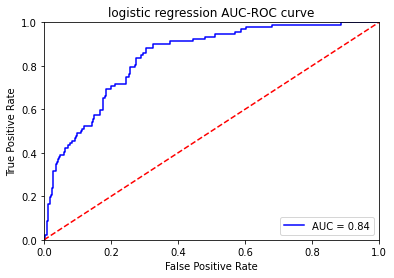

In [75]:
#plotting AUC ROC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('logistic regression AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**we can see that ,**

The training accuracy for logistic regression is 61% 

The testing accuracy of logistic regression is 61% 
Therefore logistic regression performing well on the dataset

***The AUC score of logistic regression is 0.84 .it means that our logistic regression classifier is performing well . ***

# **Logistic regression (hyperparameter tunning)**

In [76]:
#performing hyperparameter tunning on logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
logit= LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logit, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


In [77]:
#getting predicted values of y train and y test
y_pred_train_lr_ht=grid_search.predict(X_train)
y_pred_test_lr_ht=grid_search.predict(X_test)

In [78]:
#getting training and testing accuracy of decision trees classifier
print_training_accuracy(y_pred_train_lr_ht,y_train)
#
print_testing_accuracy(y_pred_test_lr_ht,y_test)

Training accuracy is 0.685
Testing accuracy  is 0.685


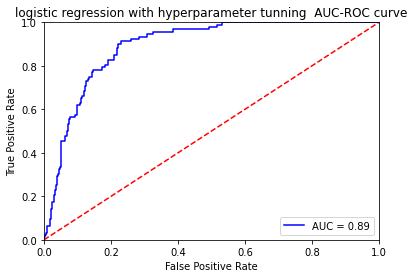

In [79]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid_search.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('logistic regression with hyperparameter tunning  AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***After applying hyperparameter tunning the testing accuracy of logistic regression the improved to 68 % . And the AUC score of the model has also improved to 0.89 ***

# **Decision trees**

Decision Tree is a Supervised learning technique that can be used for both classification and  Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured  classifier, where internal nodes represent the features of a dataset, branches represent the  decision rules and each leaf node represents the outcome.

In [80]:
#fitting decision tree classifier
from sklearn.tree import DecisionTreeClassifier
price_classifier_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
price_classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [81]:
#getting predicted values of y train and y test
y_pred_train_dt=price_classifier_dt.predict(X_train)
y_predicted_test_dt = price_classifier_dt.predict(X_test)

In [82]:
y_predicted_test_dt[:10]

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1])

In [83]:
#importing packages to visualize decision tree model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

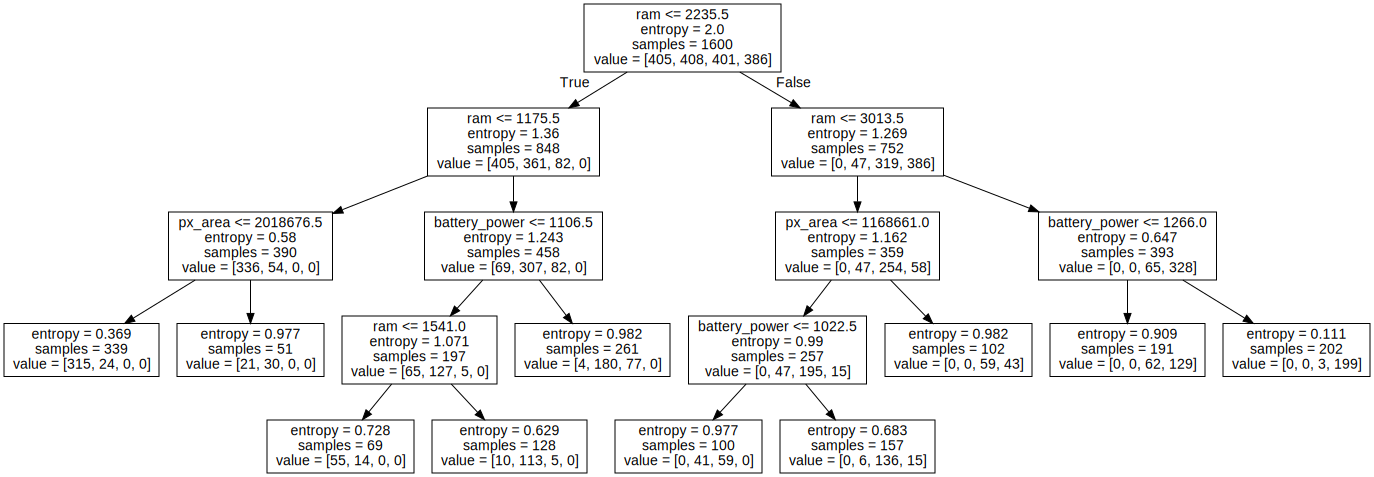

In [84]:
#visualizing decision tree classifier
graph = Source(tree.export_graphviz(price_classifier_dt, out_file=None
   , feature_names=X_train.columns))
display(SVG(graph.pipe(format='svg')))

In [85]:
#getting training and testing accuracy of decision trees classifier
print_training_accuracy(y_pred_train_dt,y_train)
#
print_testing_accuracy(y_predicted_test_dt,y_test)

Training accuracy is 0.796875
Testing accuracy  is 0.78


In [86]:
#decision tree classifier evaluation metrics
print(metrics.classification_report(y_pred_train_dt, y_train))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       408
           1       0.79      0.73      0.76       440
           2       0.63      0.71      0.67       359
           3       0.85      0.83      0.84       393

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



In [87]:
#decision tree classifier evaluation metrics
print(metrics.classification_report(y_predicted_test_dt, y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       100
           1       0.73      0.69      0.71        97
           2       0.52      0.67      0.58        76
           3       0.91      0.82      0.86       127

    accuracy                           0.78       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.80      0.78      0.79       400



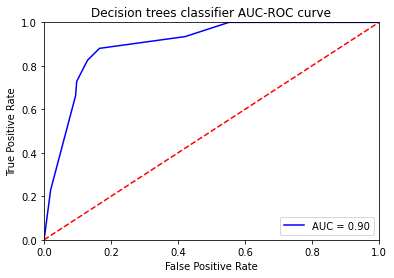

In [88]:
#plooting ROC AUC curve of Decision tree classifier
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = price_classifier_dt.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Decision trees classifier AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**The training accuracy of decision tree classifier is 79%. The decision tree classifier is giving testing  accuracy of   78%. Therefore decision tree classifier performing well on the dataset . The AUC score of the decision tree classifier is 0.90. it means that our decision tree classifier is performing well .**

# ***Random forest classifier ***

Random forests or random decision forests is an ensemble learning method  for classification, regression and other tasks that operates by constructing a  multitude of decision trees at training time.

In [89]:
#importing packges to fit random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [90]:
#fitting Random forest classifier
rf=RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [91]:
#getting predicted values of y train and y test
train_preds_rf =  rf.predict(X_train)
test_preds_rf  = rf.predict(X_test)

In [92]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [93]:
#random forest classifier evaluation metrics 
print(metrics.classification_report(train_preds_rf, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [94]:
#random forest classifier evaluation metrics 
print(metrics.classification_report(test_preds_rf, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.82      0.86      0.84        87
           2       0.80      0.78      0.79       101
           3       0.92      0.92      0.92       114

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [95]:
#getting training and testing accuracy of random forest classifier
print_training_accuracy(train_preds_rf,y_train)
#
print_testing_accuracy(test_preds_rf,y_test)

Training accuracy is 1.0
Testing accuracy  is 0.8825


In [96]:
#finding important features according to random forest classifier
importances = rf.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

In [97]:
importance_df = pd.DataFrame(importance_dict)

In [98]:
ascending_importance_df=importance_df.sort_values('Feature Importance',ascending=True)
ascending_importance_df

,Feature,Feature Importance
13,wifi,0.006298
4,four_g,0.006869
3,dual_sim,0.007136
1,blue,0.007173
12,touch_screen,0.007185
8,n_cores,0.024253
6,m_dep,0.026394
2,clock_speed,0.029527
11,talk_time,0.031787
9,pc,0.032225


<BarContainer object of 16 artists>

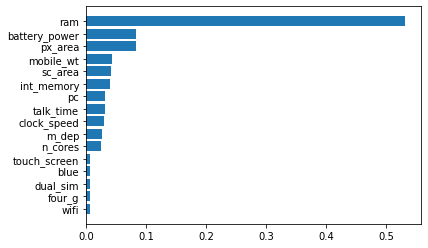

In [99]:
#plotting horizontal barplot according to feature importance
plt.barh('Feature','Feature Importance',data=ascending_importance_df)

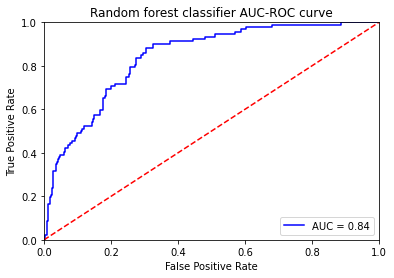

In [100]:
#plotting AUC roc curve of random forest classifier
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Random forest classifier AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The training accuracy of random forest classifier is 100% 

The random forest classifier is giving us testing  accuracy of 88%.
Therefore Random forest classifier performing well on the dataset .

 The AUC score of random forest classifier is 0.84. it means that our logistic regression classifier is performing well 

# **Random forest classifier (hyperparameter tunning)**

In [101]:
# Hyperparameter tuning of random forest classifier 

classifier = RandomForestClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/l

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [102]:
#getting predicted values of y train and y test
train_preds_ht_rf =  classifier.predict(X_train)
test_preds_ht_rf  = classifier.predict(X_test)

In [103]:
#getting training and testing accuracy of random forest classifier
# after hyperparameter tunning
print_training_accuracy(train_preds_ht_rf,y_train)
#
print_testing_accuracy(test_preds_ht_rf,y_test)

Training accuracy is 0.840625
Testing accuracy  is 0.8075


In [104]:
print(metrics.classification_report(test_preds_ht_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       112
           1       0.65      0.71      0.68        85
           2       0.61      0.74      0.67        81
           3       0.95      0.89      0.92       122

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.83      0.81      0.82       400



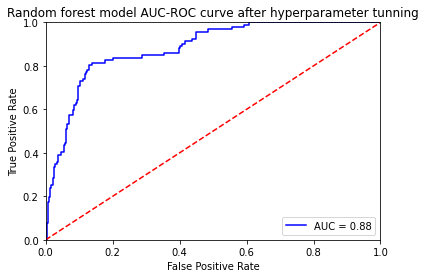

In [105]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Random forest model AUC-ROC curve after hyperparameter tunning')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

*** After applying cross validation and hyperparameter tunning the accuracy of random forest classifier the didn’t improved but the AUC score has improved to 0.90 ***

# **Naive Bayes classifier**

Naïve Bayes algorithm is a supervised learning algorithm, which is based  on Bayes theorem and used for solving classification problems.

In [106]:
#fitting Naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(X_train,y_train)

In [107]:
#getting predicted values of y train and y test
train_preds_nb =  NB.predict(X_train)
test_preds_nb = NB.predict(X_test)

In [108]:
#getting training and testing accuracy of naive bayes classifier
print_training_accuracy(train_preds_nb,y_train)
#
print_testing_accuracy(test_preds_nb,y_test)

Training accuracy is 0.796875
Testing accuracy  is 0.8125


In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_preds_nb))
print(confusion_matrix(y_test,test_preds_nb))

[[361  44   0   0]
 [ 40 290  78   0]
 [  0  71 288  42]
 [  0   0  50 336]]
[[ 86   9   0   0]
 [  6  68  18   0]
 [  0  15  66  18]
 [  0   0   9 105]]


In [111]:
# Print the classification report for train 
print(classification_report(y_train,train_preds_nb))


              precision    recall  f1-score   support

           0       0.90      0.89      0.90       405
           1       0.72      0.71      0.71       408
           2       0.69      0.72      0.71       401
           3       0.89      0.87      0.88       386

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



In [112]:
#printing evaluaton metrics of naive bayes classifier
print(classification_report(y_test,test_preds_nb))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.74      0.74      0.74        92
           2       0.71      0.67      0.69        99
           3       0.85      0.92      0.89       114

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



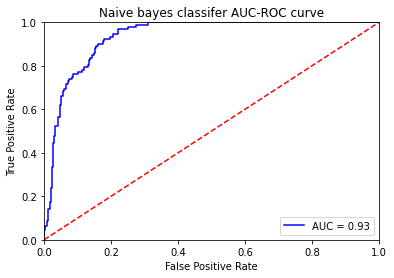

In [113]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = NB.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Naive bayes classifer AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The training accuracy of naive bayes classifier is 79% 

The Naive bayes classifier is giving accuracy  81%. Therefore naive bayes classifier is performing well on the dataset.

 The AUC score of the naive bayes classifier is 0.93. it means that our naive bayes classifier is performing well .

# ***k nearest neighborer classifier ***

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique .  KNN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new  data appears then it can be easily classified into a well suite category by using K- NN algorithm

In [114]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

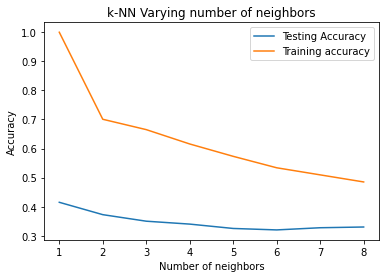

In [115]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [116]:
# Setting up  knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

In [117]:
# Fitting knn the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [118]:
knn.score(X_test,y_test)

0.3725

In [119]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [120]:
# Let us get the predictions using the classifier we had fit above
y_test_pred_kn = knn.predict(X_test)

In [121]:
y_train_pred_kn=knn.predict(X_train)

In [122]:
#getting training and testing accuracy of k nearest neighbourhood
print_training_accuracy(y_train_pred_kn,y_train)
#
print_testing_accuracy(y_test_pred_kn,y_test)

Training accuracy is 0.700625
Testing accuracy  is 0.3725


In [126]:
confusion_matrix(y_test_pred_kn,y_test)

array([[65, 41, 20, 21],
       [23, 38, 41, 30],
       [ 7,  8, 29, 46],
       [ 0,  5,  9, 17]])

In [127]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

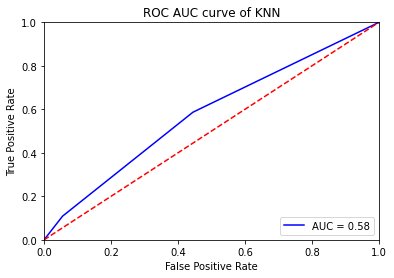

In [129]:
#plooting ROC AUC curve of knn
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('ROC AUC curve of KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [167]:
#printing evaluation metrics for knn classifier 
print(metrics.classification_report(y_train_pred_kn, y_train))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82       584
           1       0.74      0.65      0.69       462
           2       0.65      0.65      0.65       401
           3       0.40      1.00      0.57       153

    accuracy                           0.70      1600
   macro avg       0.70      0.75      0.68      1600
weighted avg       0.78      0.70      0.72      1600



In [130]:
#printing evaluation metrics for knn classifier 
print(metrics.classification_report(y_test_pred_kn, y_test))

              precision    recall  f1-score   support

           0       0.68      0.44      0.54       147
           1       0.41      0.29      0.34       132
           2       0.29      0.32      0.31        90
           3       0.15      0.55      0.23        31

    accuracy                           0.37       400
   macro avg       0.38      0.40      0.35       400
weighted avg       0.47      0.37      0.40       400



The training accuracy of knn is 70%

The K nearest neighbourhood classifier is giving testing accuracy  33%.

 Therefore k nearest neighbourhood classifier is not performing well on the dataset . The AUC score of knn is 0.58.it means model is performing not much well on dataset

# **Conclusions  :**

Conclusions from EDA : 

Price of the mobile phone is directly proportional to the RAM of the mobile .

As the ram of the mobile is increasing the price the mobile is also increasing.

There are various price ranges available for different types of battery power variants, internal memory variants and primary camera megapixel variants of the mobile phones.
 
And from correlation plot we can say that ram is highly correlated with price range of the mobile and battery power also is moderately correlated with price range of the mobile 

Conclusions from Prediction model :

Among all the models random forest model is giving highest  accuracy of 88% with AUC score 0.84. so we can use random forest classifier to predict  the price range of the mobile phones. And according to the random forest model the most important factors that are  affecting the prices of the mobile phones are: RAM , battery power, pixel area,  mobile weight, screen area ,internal memory.